<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/hw_1_night.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
def bgr2rgb(image):
# Convert BGR image to RGB
    return  image[:, :, ::-1]

In [ ]:
image = cv2.imread('starry_night.jpg')

In [ ]:
image.shape

(600, 752, 3)

In [ ]:
output_image = bgr2rgb(image)


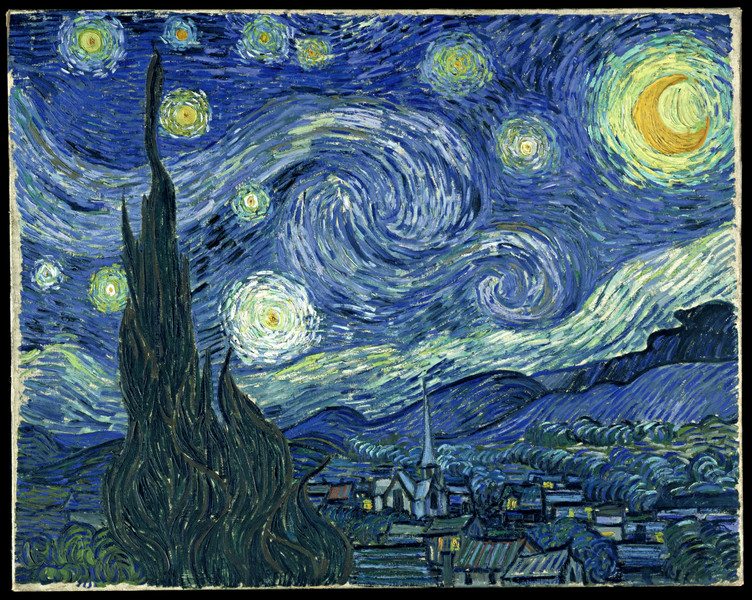

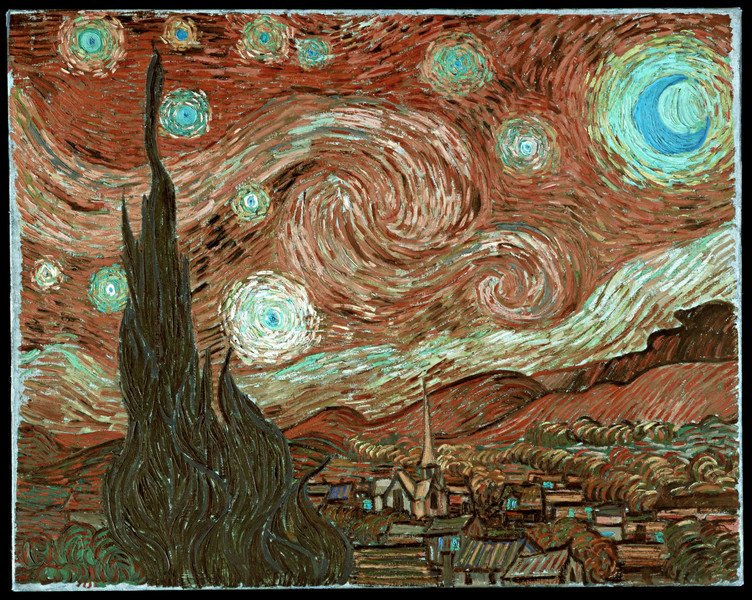

In [ ]:
cv2_imshow(image)
cv2_imshow(output_image)

Задание 2: Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

In [ ]:
from PIL import Image
from PIL import ImageShow

In [ ]:
#Вырезка и копирование вихря
im = Image.open('starry_night.jpg')
width, height = im.size
width, height

(752, 600)

In [ ]:
im.paste(im.crop((310, 140, 460, 300)), (585, 30))

In [ ]:
#Вырезка и копирование луны
im1 = Image.open('starry_night.jpg')

In [ ]:
im.paste(im1.crop((590, 20, 730, 200)), (305, 105))
im.save('new_modified_.jpg')

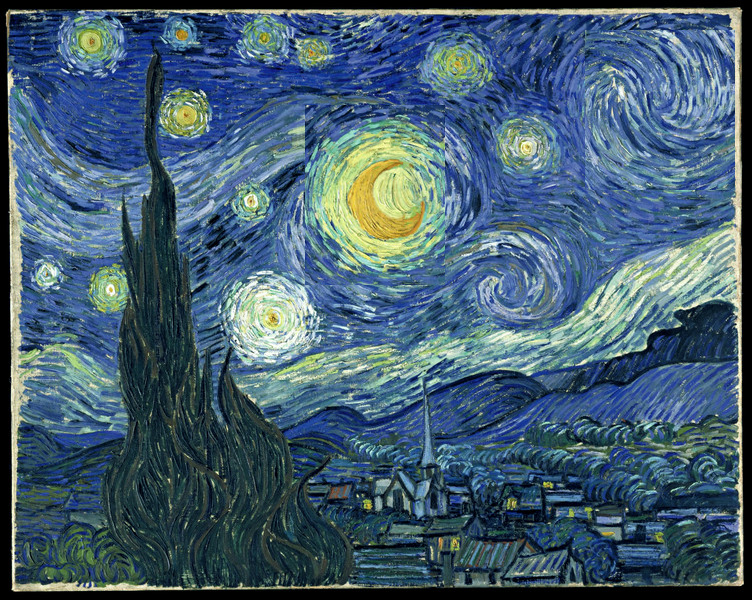

In [ ]:
im.copy()

Задание 3: Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).


In [226]:
import cv2 as cv
import numpy as np

In [227]:
image = cv.imread('starry_night.jpg')
hsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)

In [228]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [229]:
blue_l=np.array([100,10,10])
blue_h=np.array([255,255,255])

In [230]:
mask=cv.inRange(hsv,blue_l,blue_h)

In [231]:
rgb=cv.cvtColor(image,cv.COLOR_BGR2RGB)

In [232]:
image[mask>0]=rgb[mask>0]

In [234]:
image = increase_brightness(image, value=30)

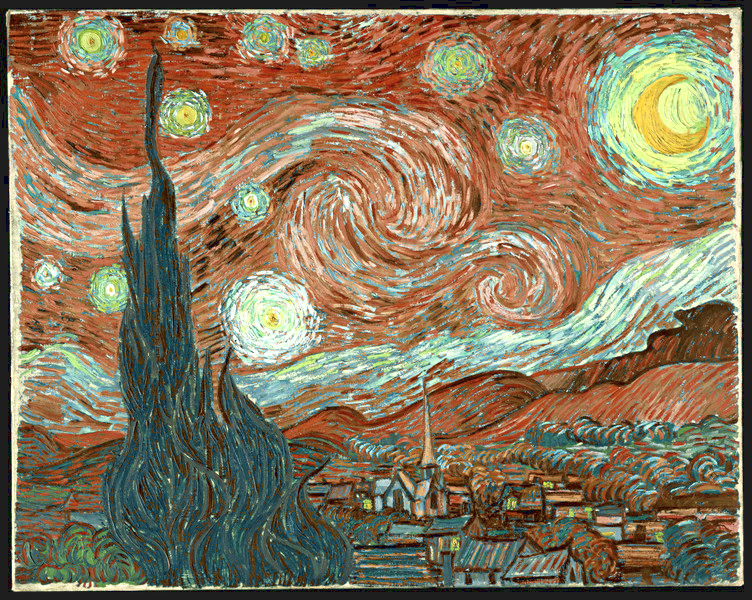

In [235]:
cv2_imshow(image)